In [66]:
using PyPlot
using JuMP, Ipopt

In [87]:
include("../src/model.jl");
include("../src/diagnostics.jl");
include("../src/optimization.jl");
include("../src/plotting.jl");
include("../src/defaults.jl");

## Initialize model

In [88]:
dt = 1.
t = Array(2020:dt:2100);
model = ClimateModel(
    "soldatenko",
    t,
    dt,
    present_year,
    Economics0(t),
    Physics(),
    init_zero_controls(t)
);

In [91]:
optimize_controls!(
    model,
    obj_option = "temp",
    temp_goal = δT_init+1.0,
    temp_final = δT_init,
    max_deployment=Dict("remove"=>0., "mitigate"=>0., "geoeng"=>1., "adapt"=>0.),
    start_deployment=Dict("remove"=>2020., "mitigate"=>2020., "geoeng"=>2020., "adapt"=>2020.),
);

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1040
Number of nonzeros in inequality constraint Jacobian.:      322
Number of nonzeros in Lagrangian Hessian.............:     1123

Total number of variables............................:      562
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      400
                     variables with only upper bounds:        0
Total number of equality constraints.................:      482
Total number of inequality constraints...............:       81
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       81

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

### Plotting the optimal solution state

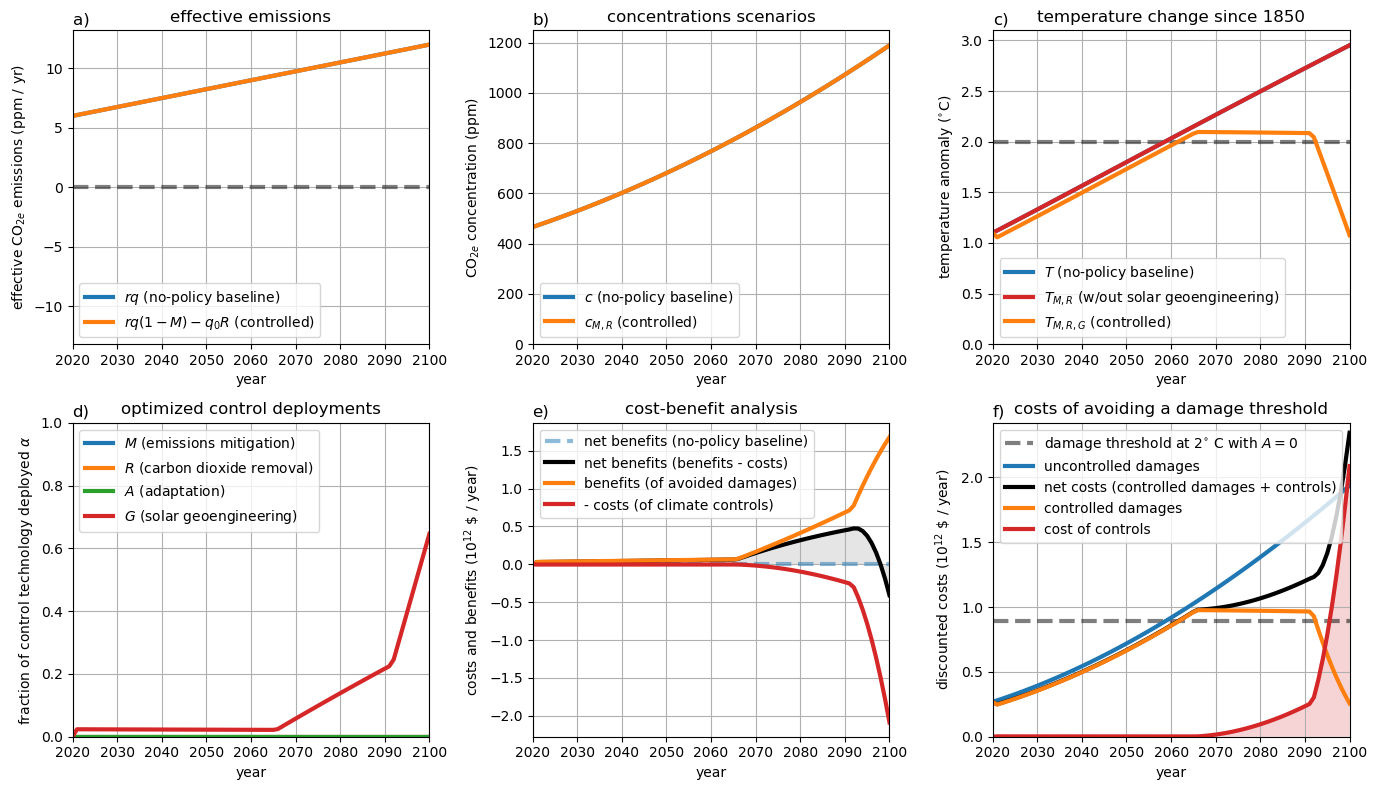

In [92]:
plot_state(model)

savefig("../figures/replicate_soldatenko.png", bbox_inches="tight", dpi=100)